**Submitted By :**
- Khalid Waleed Aljandal (438012619)
- Abdulmaleak H bin manea (438010605)
- Aref Mansoor Alotaibi (439027005)

**Supervisor :**
- Prof. Hachemi BENNACEUR

# Introduction
The objective is applying a searching algorithm to reach a specific goal. In a search problem we typically have a set of states, and starting from an initial state we want to find a sequence of actions (transitions) that will take us from the initial state to the goal state. We will explore a search algorithms in this notebook. The algorithm is Alpha-beta pruning (which is an adversarial search type). In an adversarial game win of one player is a loss of the other.

# المقدمة
الهدف هو تطبيق خوارزمية بحث للوصول إلى هدف معين. في مشكلة البحث ، لدينا عادةً مجموعة من الحالات ، وبدءًا من الحالة الأولية ، نريد العثور على سلسلة من الإجراءات (التحولات) التي ستأخذنا من الحالة الأولية إلى حالة الهدف. سنستكشف خوارزميات البحث في هذا الكتيب هي خوارزمية تشذيب ألفا بيتا (وهي نوع بحث عدائي). في لعبة عدائية فوز لاعب واحد هو خسارة للاعب آخر.

# An Example Problem
We will apply the adversarial search algorithm mentioned above on a tic-tac-toe game [1], in which we try to find the sequence of player’s decisions (moves) maximizing its utility. A tic-tac-toe game can be easily formulated as state space search problem, and that enables us to apply the adversarial search algorithm on it like the Alpha-beta pruning algorithm. More specifically, we can assume that the empty board is the initial state, the goal is to find the best move available and the actions are a list of legal moves.

In the figure below [1], we can see a visualization of the tic-tac-toe game from a certain state in the game where all possible moves are calculated (game tree).

A game with 2 players (MAX and MIN, MAX moves first, turn-taking) can be defined as a search problem with:
* Initial state: board position
* Successor function: a list of legal (move, state) pairs
* Terminal Test: checks if the game finished
* Goal test: whether the game is over – terminal states
* Utility function: gives a numeric value for the terminal states (win 1, loss -1, draw 0)
* Game tree = initial state + legal moves

# مثال على المشكلة
سنقوم بتطبيق خوارزمية البحث العدائية المذكورة أعلاه في لعبة إكس-أو  [1] ، حيث نحاول العثور على تسلسل قرارات (تحركات) اللاعب لزيادة فائدته. يمكن صياغة لعبة إكس-أو بسهولة كمشكلة بحث في مساحة الحالة ، وهذا يمكننا من تطبيق خوارزمية البحث العدائية عليها مثل خوارزمية تشذيب ألفا-بيتا. وبشكل أكثر تحديدًا ، يمكننا أن نفترض أن اللوحة الفارغة هي الحالة الأولية ، والهدف هو العثور على أفضل حركة متاحة وأن الإجراءات هي قائمة بالتحركات المسموحة.

في الشكل أدناه [1] ، يمكننا أن نرى تصوراً للعبة إكس-أو من حالة معينة في اللعبة حيث يتم حساب جميع التحركات الممكنة (شجرة اللعبة).


:لعبة لاثنين لاعبين ( اكبر ، اصغر ، اكبر حركة اولا ، تناوب ) يمكن تعريفها مشكلة البحث الى 


* الحالة الأولية: موضع اللوحة
* الوظيفة اللاحقة: قائمة مرتبطة بالحركات المسموحة (الحركة ، الحالة)
* الاختبار النهائي: يتحقق من انتهاء اللعبة
* اختبار الهدف: ما إذا كانت اللعبة انتهت - حالات نهائية
* دالة المنفعة: تعطي قيمة عددية للحالات النهائية (فوز 1 ، خسارة -1 ، تعادل 0)
* شجرة اللعبة = الحالة الأولية + التحركات المسموحة

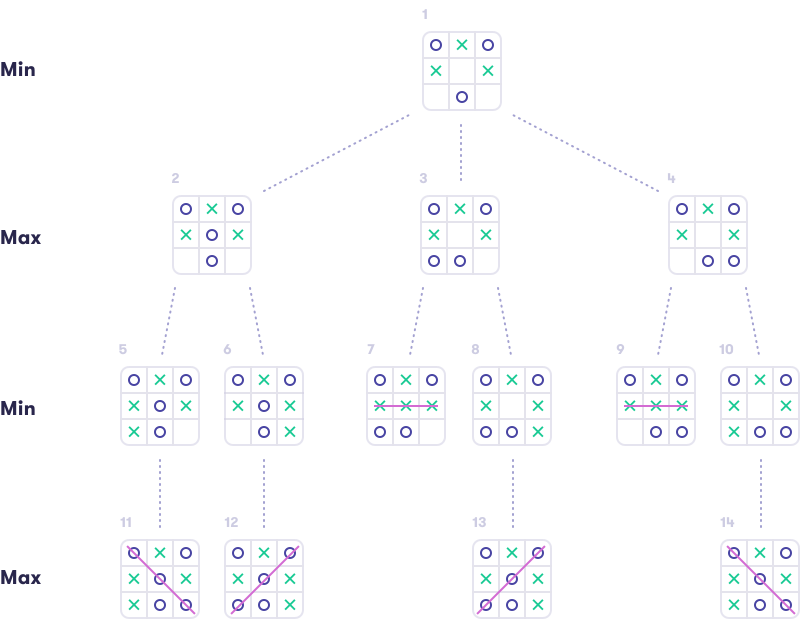

In [2]:
# Figure 1 [1]
from IPython.display import Image
Image(filename='Tic-Tac-Toe.png')

## Defining the empty grid for the tic-tac-toe game.
We will write the first part of our code which is responsible of creating the empty board of the game

## تعريف لوحة فارغة للعبة إكس-أو 
هنا سنبدأ بكتابة أول جزء من البرنامج وهو المسئول عن إنشاء لوحة فارغة للعبة

In [1]:
# Include the needed libraries
import copy
import os
import random
import colorama
from termcolor import colored

#this is necessary in order to display colors in windows
colorama.init()

#this is the empty tic-tac-toe board
GRID = [
    [None, None, None],
    [None, None, None],
    [None, None, None]]

#indexes of all the rows, coloumns, and diagonals
ELEMENTS = [
    [(0, 0), (0, 1), (0, 2)],
    [(0, 0), (1, 0), (2, 0)],
    [(1, 0), (1, 1), (1, 2)],
    [(0, 1), (1, 1), (2, 1)],
    [(2, 0), (2, 1), (2, 2)],
    [(0, 2), (1, 2), (2, 2)],
    [(0, 0), (1, 1), (2, 2)],
    [(0, 2), (1, 1), (2, 0)]]

# return a randomly shuffled version of an interable    
def shuffled(iter):
    iter = list(iter)
    random.shuffle(iter)
    return iter

#prints the current board and asks for your next move        
def display(grid):
    x = [grid[i][j] or " " for i in range(3) for j in range(3)]

    result = """
         7 | 8 | 9                       {} | {} | {}
        ---+---+---                     ---+---+---
         4 | 5 | 6                       {} | {} | {}
        ---+---+---                     ---+---+---
         1 | 2 | 3                       {} | {} | {}
    
        Choose a number : """.format(*x)

    print(result, end="")

# ask for player input : a number between 1 and 9
def get_user_input(grid):
    while True:
        display(grid)
        choice = input()
        # validate input
        if choice not in [str(i) for i in range(1, 10)]:
            continue
        choice = int(choice)
        i, j = coordinates(choice)
        if grid[i][j] != None:
            continue
        # if cell is not full : fill with 'X'
        grid[i][j] = "X"
        break
        
#return the row and coloumn corresponding to user input
def coordinates(choice):
    # get row
    row = 3 - ((choice + 2) // 3)
    # get col
    col = (choice - 1) % 3
    return row, col

# The Algorithm  (الخوارزمية)

## The Minimax Algorithm:

The Minimax algorithm [2] relies on brute force and a simple evaluation function. Let's assume that every time during deciding the next move we search through a whole tree, all the way down to leaves. Effectively we would look into all the possible outcomes and every time we would be able to determine the best possible move.

However, for non-trivial games, that practice is inapplicable. Even searching to a certain depth sometimes takes an unacceptable amount of time. Therefore, Minimax applies search to a fairly low tree depth aided with a well designed, yet simple evaluation function.

The evaluation function is a static number, that in accordance with the characteristics of the game itself, is being assigned to each node (state).

Here's a simple illustration of Minimax' steps (Figure 2). Max wins if the value of the game is +1, Min if the value is –1, and if the value is 0, then the game will end in a draw. We're looking for the minimum value, in this case. 
The second layer calls the Max() method on nodes in the child nodes and the layer after calls the Min() method on child nodes.
In this example we are deciding the best move for green player using depth 3.

This all is based on the assumption that both players choose what is best for them and that what is best for one is the worst for the other (so called "zero-sum game").

##   أولا: خوارزمية الحد الأدنى

تعتمد خوارزمية الحد الأدنى [2] على القوة الغاشمة ووظيفة التقييم البسيطة. لنفترض أنه في كل مرة أثناء تحديد الخطوة التالية ، نبحث عبر شجرة كاملة ، وصولاً إلى الأوراق. على نحو فعال ، سننظر في جميع النتائج المحتملة وفي كل مرة سنتمكن من تحديد أفضل حركة ممكنة.

ومع ذلك ، بالنسبة للألعاب غير العادية ، فإن هذه الممارسة غير قابلة للتطبيق. حتى البحث في عمق معين يستغرق أحيانًا قدرًا غير مقبول من الوقت. لذلك ، تقوم خوارزمية الحد الأدنى بتطبيق البحث على عمق شجرة منخفض إلى حد ما بمساعدة وظيفة تقييم جيدة التصميم وبسيطة.

وظيفة التقييم هي رقم ثابت يتم تخصيصه لكل الخصائص (حالة) وفقًا لخصائص اللعبة نفسها.

فيما يلي توضيح بسيط لخطوات الحد الأدنى(الشكل 2). يفوز الاكبر إذا كانت قيمة اللعبة +1 ، أصغر إذا كانت القيمة –1 ، وإذا كانت القيمة 0 ، فستنتهي اللعبة بالتعادل. نحن نبحث عن الحد الأدنى للقيمة ، في هذه الحالة.
تستدعي الطبقة الثانية أسلوب الاكبر () على العقد في العقد الفرعية والطبقة بعد استدعاء أسلوب الاصغر () على العقد التابعة.
في هذا المثال ، نقرر أفضل حركة للاعب أخضر باستخدام العمق 3.

كل هذا مبني على افتراض أن كلا اللاعبين يختاران ما هو الأفضل بالنسبة لهما وأن الأفضل بالنسبة لأحدهما هو الأسوأ بالنسبة للآخر (ما يسمى "لعبة محصلتها صفر").


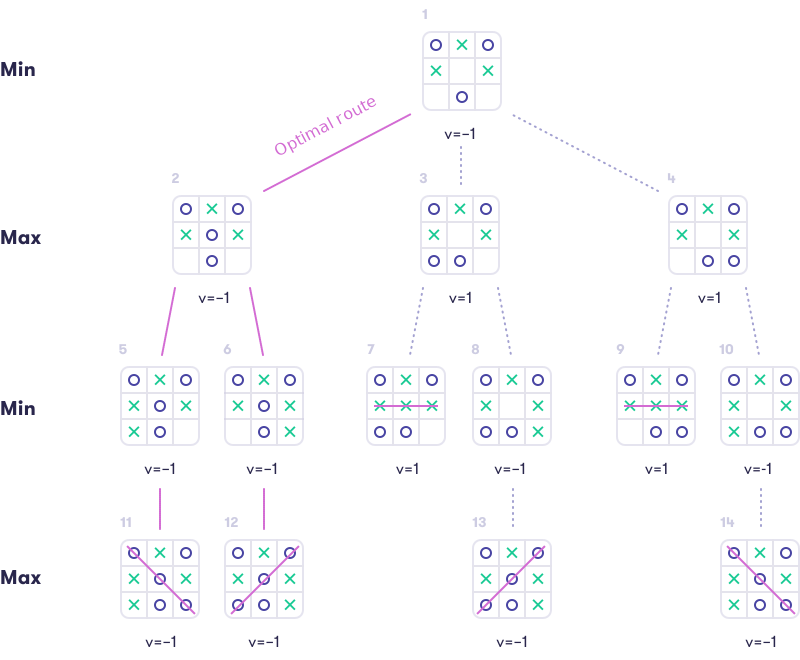

In [1]:
# Figure 2 
from IPython.display import Image
Image(filename='Minimax_example.png')

## The Alpha-beta Algorithm:

The Minimax algorithm [2] is a relatively simple algorithm used for optimal decision-making in game theory and artificial intelligence. Since these algorithms rely on being efficient, the algorithm's performance can be improved by using an alpha-beta pruning technique. Alpha-beta pruning was proposed independently by several researchers including John McCarthy in and around 1960 [4]. It stops evaluating a move when it makes sure that it's worse than previously examined move. Such moves need not to be evaluated further.

The main concept is to maintain two values through whole search [3]:
* Alpha: Best already explored option for player Max
* Beta: Best already explored option for player Min

This method allows us to ignore many branches that lead to values that won't be of any help for our decision, nor they would affect it in any way.

Figure 3 below is an example of cutting off branches that do not effect the outcome. 

## خوارزمية الفا-بيتا:

خوارزمية الحد الأدنى [2] هي خوارزمية بسيطة نسبيًا تستخدم لصنع القرار الأمثل في نظرية الألعاب والذكاء الاصطناعي. نظرًا لأن هذه الخوارزميات تعتمد على الكفاءة ، يمكن تحسين أداء الخوارزمية باستخدام تقنية تشذيب ألفا بيتا. تم اقتراح تشذيب ألفا بيتا بشكل مستقل من قبل العديد من الباحثين بما في ذلك جون مكارثي في عام 1960 [4]. يتوقف عن تقييم الحركة عندما يتأكد من أنها أسوأ من الخطوة التي تم فحصها مسبقًا. مثل هذه التحركات لا تحتاج إلى مزيد من التقييم.

المفهوم الرئيسي هو الحفاظ على القيم من خلال البحث الكامل [3]:
* ألفا: أفضل خيار تم استكشافه بالفعل للاعب الأكبر
* بيتا: أفضل خيار تم استكشافه بالفعل للاعب الأصغر

تسمح لنا هذه الطريقة بتجاهل العديد من الفروع التي تؤدي إلى قيم لن تكون ذات فائدة لقرارنا ، ولن تؤثر عليها بأي شكل من الأشكال.

الشكل 3 أدناه مثال على قطع الفروع التي لا تؤثر على النتيجة.

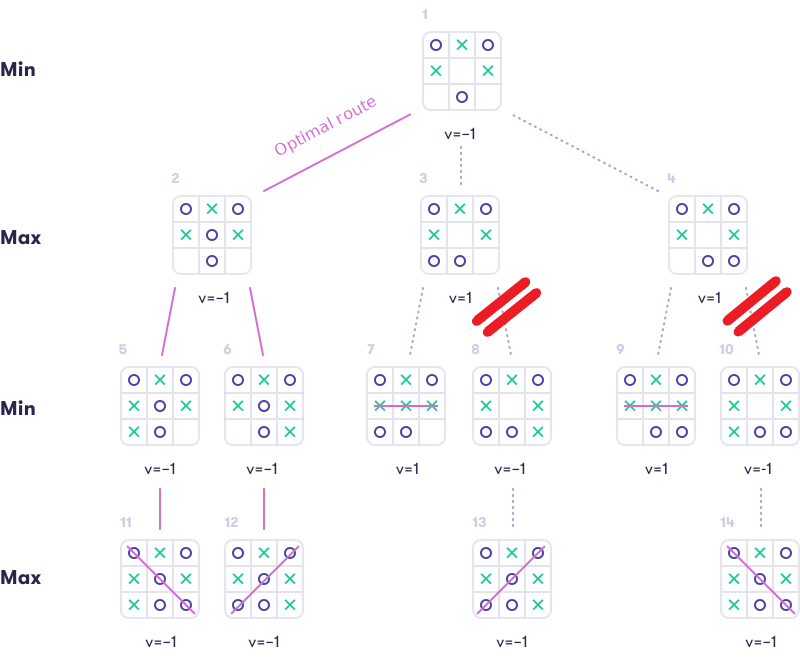

In [4]:
# Figure 3
from IPython.display import Image
Image(filename='Alpha-beta_Pruning.png')

### Implementation
Now we will see how to implement the algorithm from scratch

### التنفيذ
والان سنرى كيف يتم تنفيذ الخوارزمية من الصفر

In [2]:
#check if a player wins the game
def win_player(grid, char):
    # check rows
    for i in range(3):
        if all(grid[i][j] == char for j in range(3)):
            return True
    # check columns
    for j in range(3):
        if all(grid[i][j] == char for i in range(3)):
            return True
    # check diagonals
    if all(grid[i][i] == char for i in range(3)):
        return True
    if all(grid[i][2 - i] == char for i in range(3)):
        return True
    
#check if the game is at a terminal state
def terminal(grid):
    # player wins
    if win_player(grid, "X"):
        return True
    # computer wins
    if win_player(grid, "O"):
        return True
    # tie
    if all(grid[i][j] != None for i in range(3) for j in range(3)):
        return True
    # otherwise the game isn't over yet
    return False

#return the score corresponding to the terminal state
def utility(grid): 
    if win_player(grid, "X"):
        return -1
    if win_player(grid, "O"):
        return 1
    return 0

#return possible actions a player can take at each state
def actions(grid):
    result = []
    for i in shuffled(range(3)):
        for j in shuffled(range(3)):
            if grid[i][j] == None:
                result.append((i, j))
    return result

#return the maximum value a player can obtain at each step
def minimax(grid, computer, alpha, beta):
    if terminal(grid):
        return utility(grid)

    if computer:
        func = max
        m = -float("inf")
        char = "O"
    else:
        func = min
        m = float("inf")
        char = "X"

    for action in actions(grid):
        i, j = action
        grid[i][j] = char
        value = minimax(grid, not computer, alpha, beta)
        m = func(m, value)
        # undo the move
        grid[i][j] = None
        # alpha-beta pruning
        if computer:
            alpha = func(alpha, m)
        else:
            beta = func(beta, m)

        if beta <= alpha:
            break

    return m

#find all empty cells and compute the minimax for each one
def best_move(grid):
    alpha = -float("inf")
    beta = float("inf")
    m = -float("inf")
    for action in actions(grid):
        i, j = action
        grid[i][j] = "O"
        value = minimax(grid, False, alpha, beta)
        if value > m:
            result = (i, j)
            m = value
        # undo the move
        grid[i][j] = None
    return result

def game_loop(grid):
    while True:
        # player turn
        get_user_input(grid)
        display(grid)
        # check if the player wins
        if win_player(grid, "X"):
            print(colored("\n\tYou win!", "green"))
            break
        # check if it's a tie
        if terminal(grid):
            print(colored("\n\tTie!", "blue"))
            break
        # computer turn
        # find the best move to play
        i, j = best_move(grid)
        grid[i][j] = "O"
        # display the grid
        display(grid)
        # check if the computer wins with this choice
        if win_player(grid, "O"):
            print(colored("\n\tYou lose!", "red"))
            break

### Applying the algorithm
Now lets play tic tac toe with the AI. The player plays the first move. It will always be a tie or the player losses.


### تطبيق الخوارزمية 
الان دعنا نلعب إكس-أو مع الذكاء الاصطناعي , اللاعب لديه اول حركة , دائما ماتكون نتيجة اللعب هي إما خسارة لللاعب او تعادل

In [ ]:
def play():
    while True:
        grid = copy.deepcopy(GRID)
        game_loop(grid)
        again = input("\tplay again ? [y/n] ")
        if again.upper() != "Y":
            break
            

if __name__ == "__main__":
            play()


         7 | 8 | 9                         |   |  
        ---+---+---                     ---+---+---
         4 | 5 | 6                         |   |  
        ---+---+---                     ---+---+---
         1 | 2 | 3                         |   |  
    
        Choose a number : 

## Conclusion

We’ve created the Utility and Evaluation Function that is used by Minimax algorithm. Note that using the minimax algorithm with pruning will significantly decrease the execution time of large complex games. Even though tic-tac-toe is a simple game, you can still notice the difference in the time the AI takes to make a move. 


## الخلاصة

لقد أنشأنا وظيفة الأداة المساعدة والتقييم التي تستخدمها خوارزمية الحد الأدنى. لاحظ أن استخدام خوارزمية الحد الأدنى مع التقليم سيقلل بشكل كبير من وقت تنفيذ الألعاب المعقدة الكبيرة. على الرغم من أن لعبة أكس-اوهي لعبة بسيطة ، فلا يزال بإمكانك ملاحظة الفرق في الوقت الذي يستغرقة الذكاء الاصنطاعي في اتخاذ خطوة.

# References and Resources (المصادر)
[1] https://course.elementsofai.com/2/3

[2] https://stackabuse.com/minimax-and-alpha-beta-pruning-in-python/

[3] https://towardsdatascience.com/create-ai-for-your-own-board-game-from-scratch-minimax-part-2-517e1c1e3362

[4] https://materiaalit.github.io/intro-to-ai-17/part2/